In [ ]:
# load the dataset 
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_excel('/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/condition Hydraulic.xlsx')
df.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,35.166667,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,35.000000,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,NaN,1.113217,59.543150,3,100,0,130,1,34.833333,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,34.666667,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,34.500000,0


In [ ]:
print(df.shape)
nan_stats = df.isnull().sum().sort_values(ascending = False)/df.shape[0]
nan_stats

(2205, 25)


CE1            0.000454
stable         0.000000
TS1            0.000000
cycle_id       0.000000
date           0.000000
PS1            0.000000
PS2            0.000000
PS3            0.000000
PS4            0.000000
PS5            0.000000
PS6            0.000000
FS1            0.000000
FS2            0.000000
TS2            0.000000
accumulator    0.000000
TS3            0.000000
TS4            0.000000
P1             0.000000
VS1            0.000000
CP1            0.000000
SE1            0.000000
cooler         0.000000
valve          0.000000
leakage        0.000000
Unnamed: 0     0.000000
dtype: float64

In [ ]:
df.describe()

,Unnamed: 0,cycle_id,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,1103.000000,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,6.198549,9.649453,45.424567,50.365979,47.662121,40.735654,2495.509203,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,636.672993,636.672993,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,1.032883,0.449246,7.991933,7.396254,7.451888,8.107878,73.836682,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,0.000000,1.000000,155.391547,104.406307,0.840252,0.000000,8.365800,8.321527,2.018572,8.857513,35.313783,40.859400,38.245733,30.390800,2361.747267,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,551.000000,552.000000,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,6.391670,9.203397,36.237150,41.864183,39.123183,31.272567,2442.933467,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,1102.000000,1103.000000,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,6.576673,9.692270,44.836650,49.780583,47.070250,40.429050,2480.926633,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,1653.000000,1654.000000,161.000735,109.421612,1.932047,3.503266,9.844351,9.729275,6.657508,10.155008,54.104317,58.584467,55.694433,49.409500,2548.211467,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,2204.000000,2205.000000,180.922708,131.589089,2.023398,10.207068,9.978510,9.856591,6.722707,10.403098,57.899283,61.958467,59.423167,53.060417,2740.641000,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


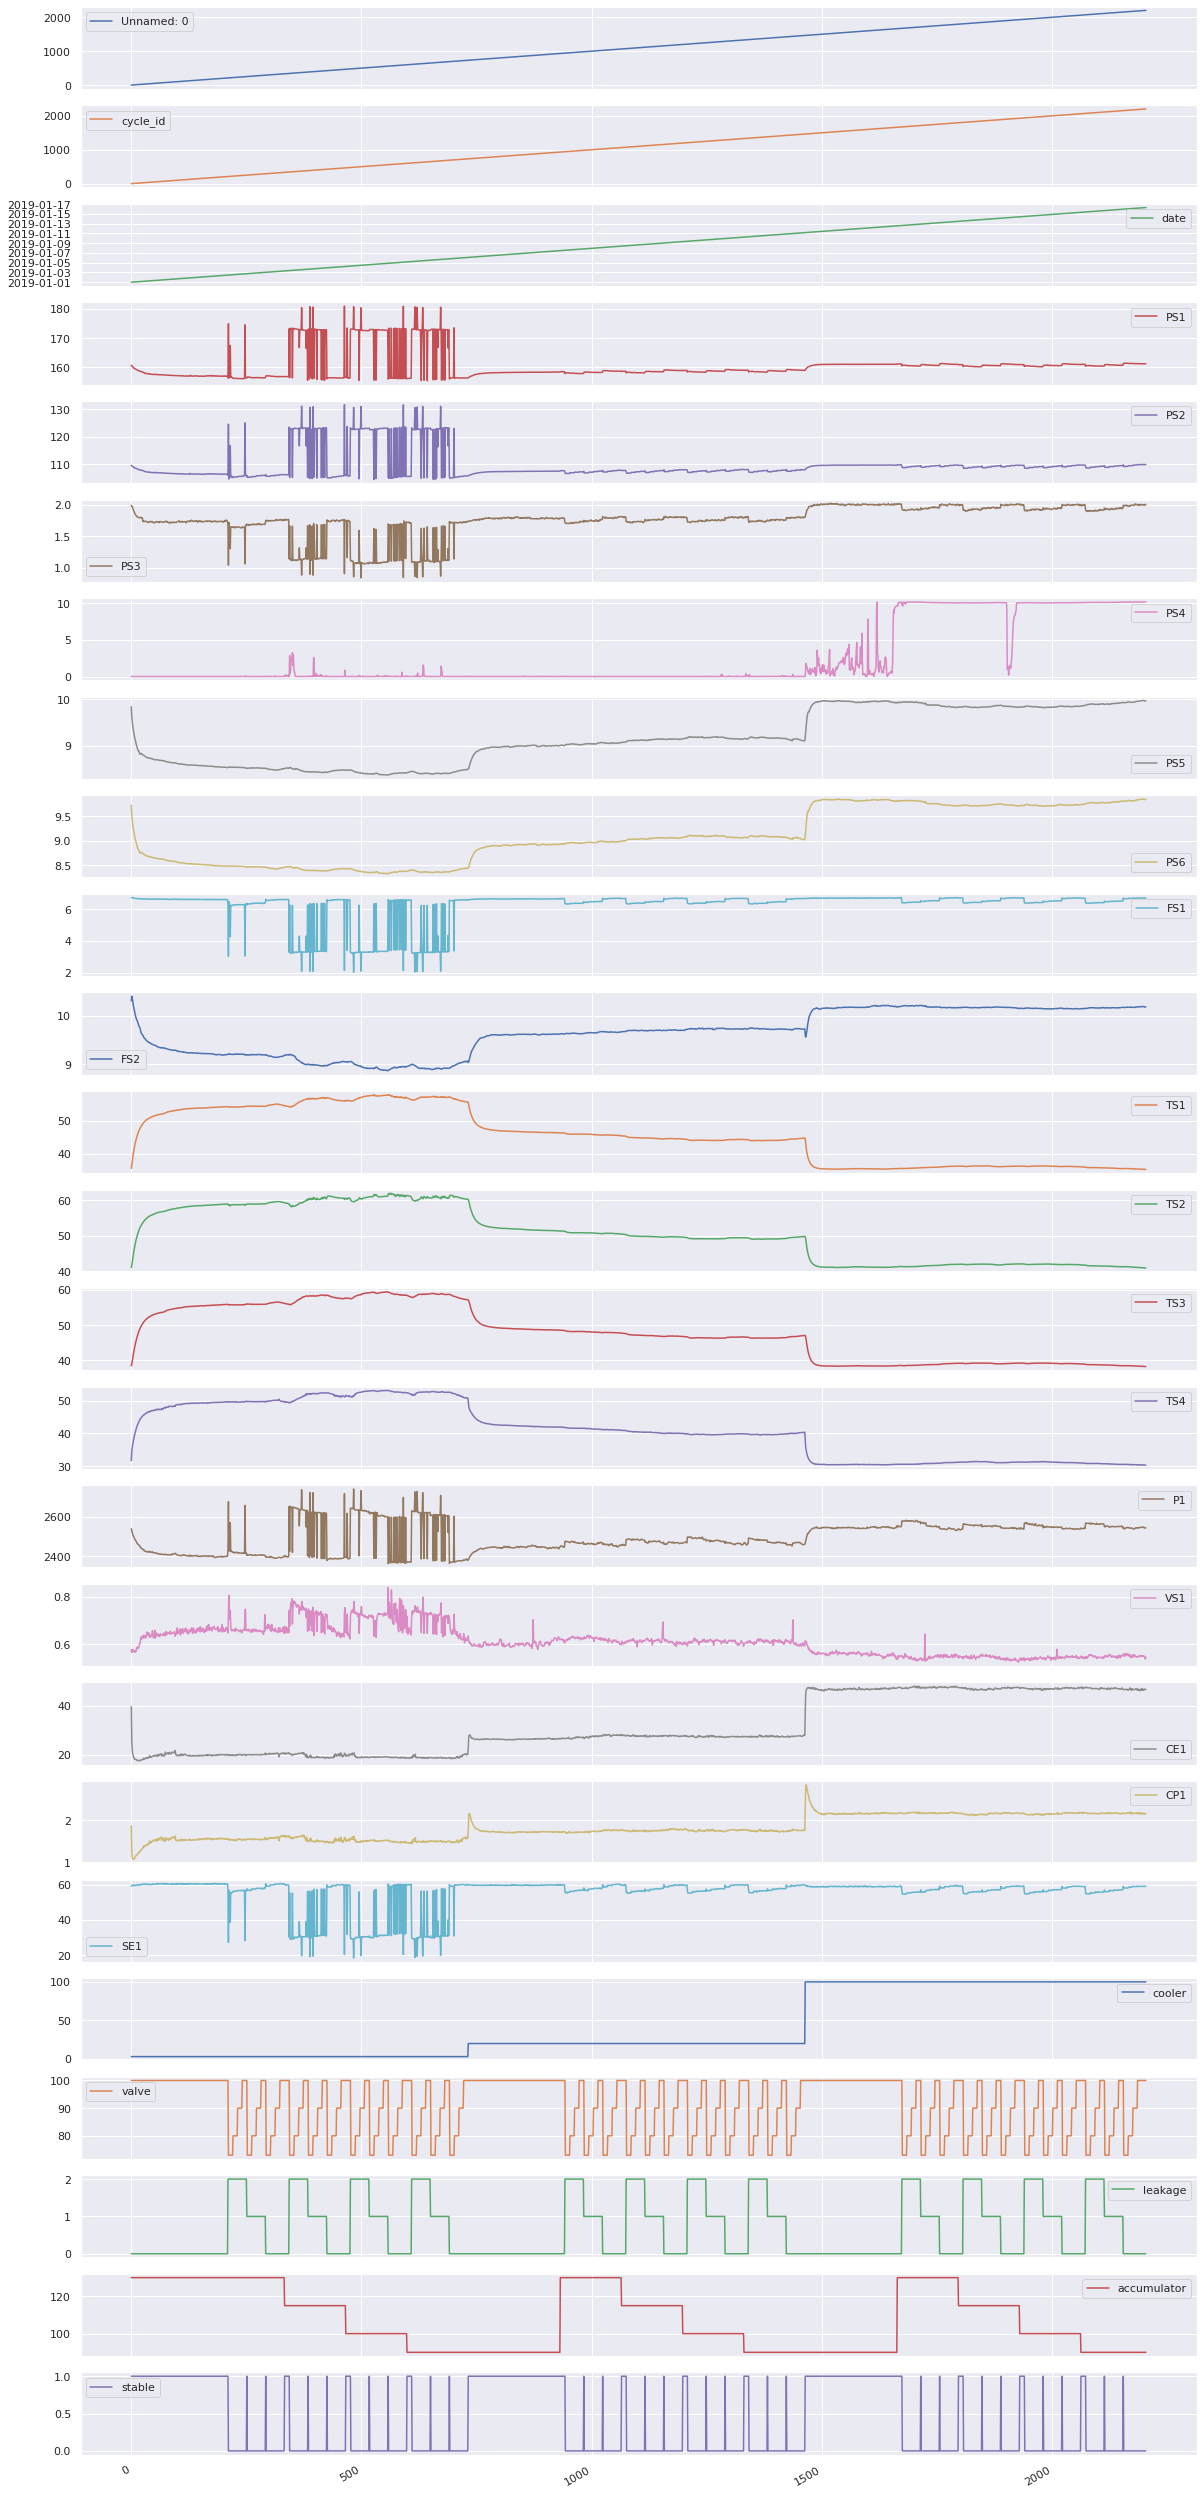

In [ ]:
import matplotlib.pyplot as plt
print(df.plot(subplots =True, sharex = True, figsize = (20,50)))

In [ ]:
df0 = pd.DataFrame(df, columns=['PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1'])

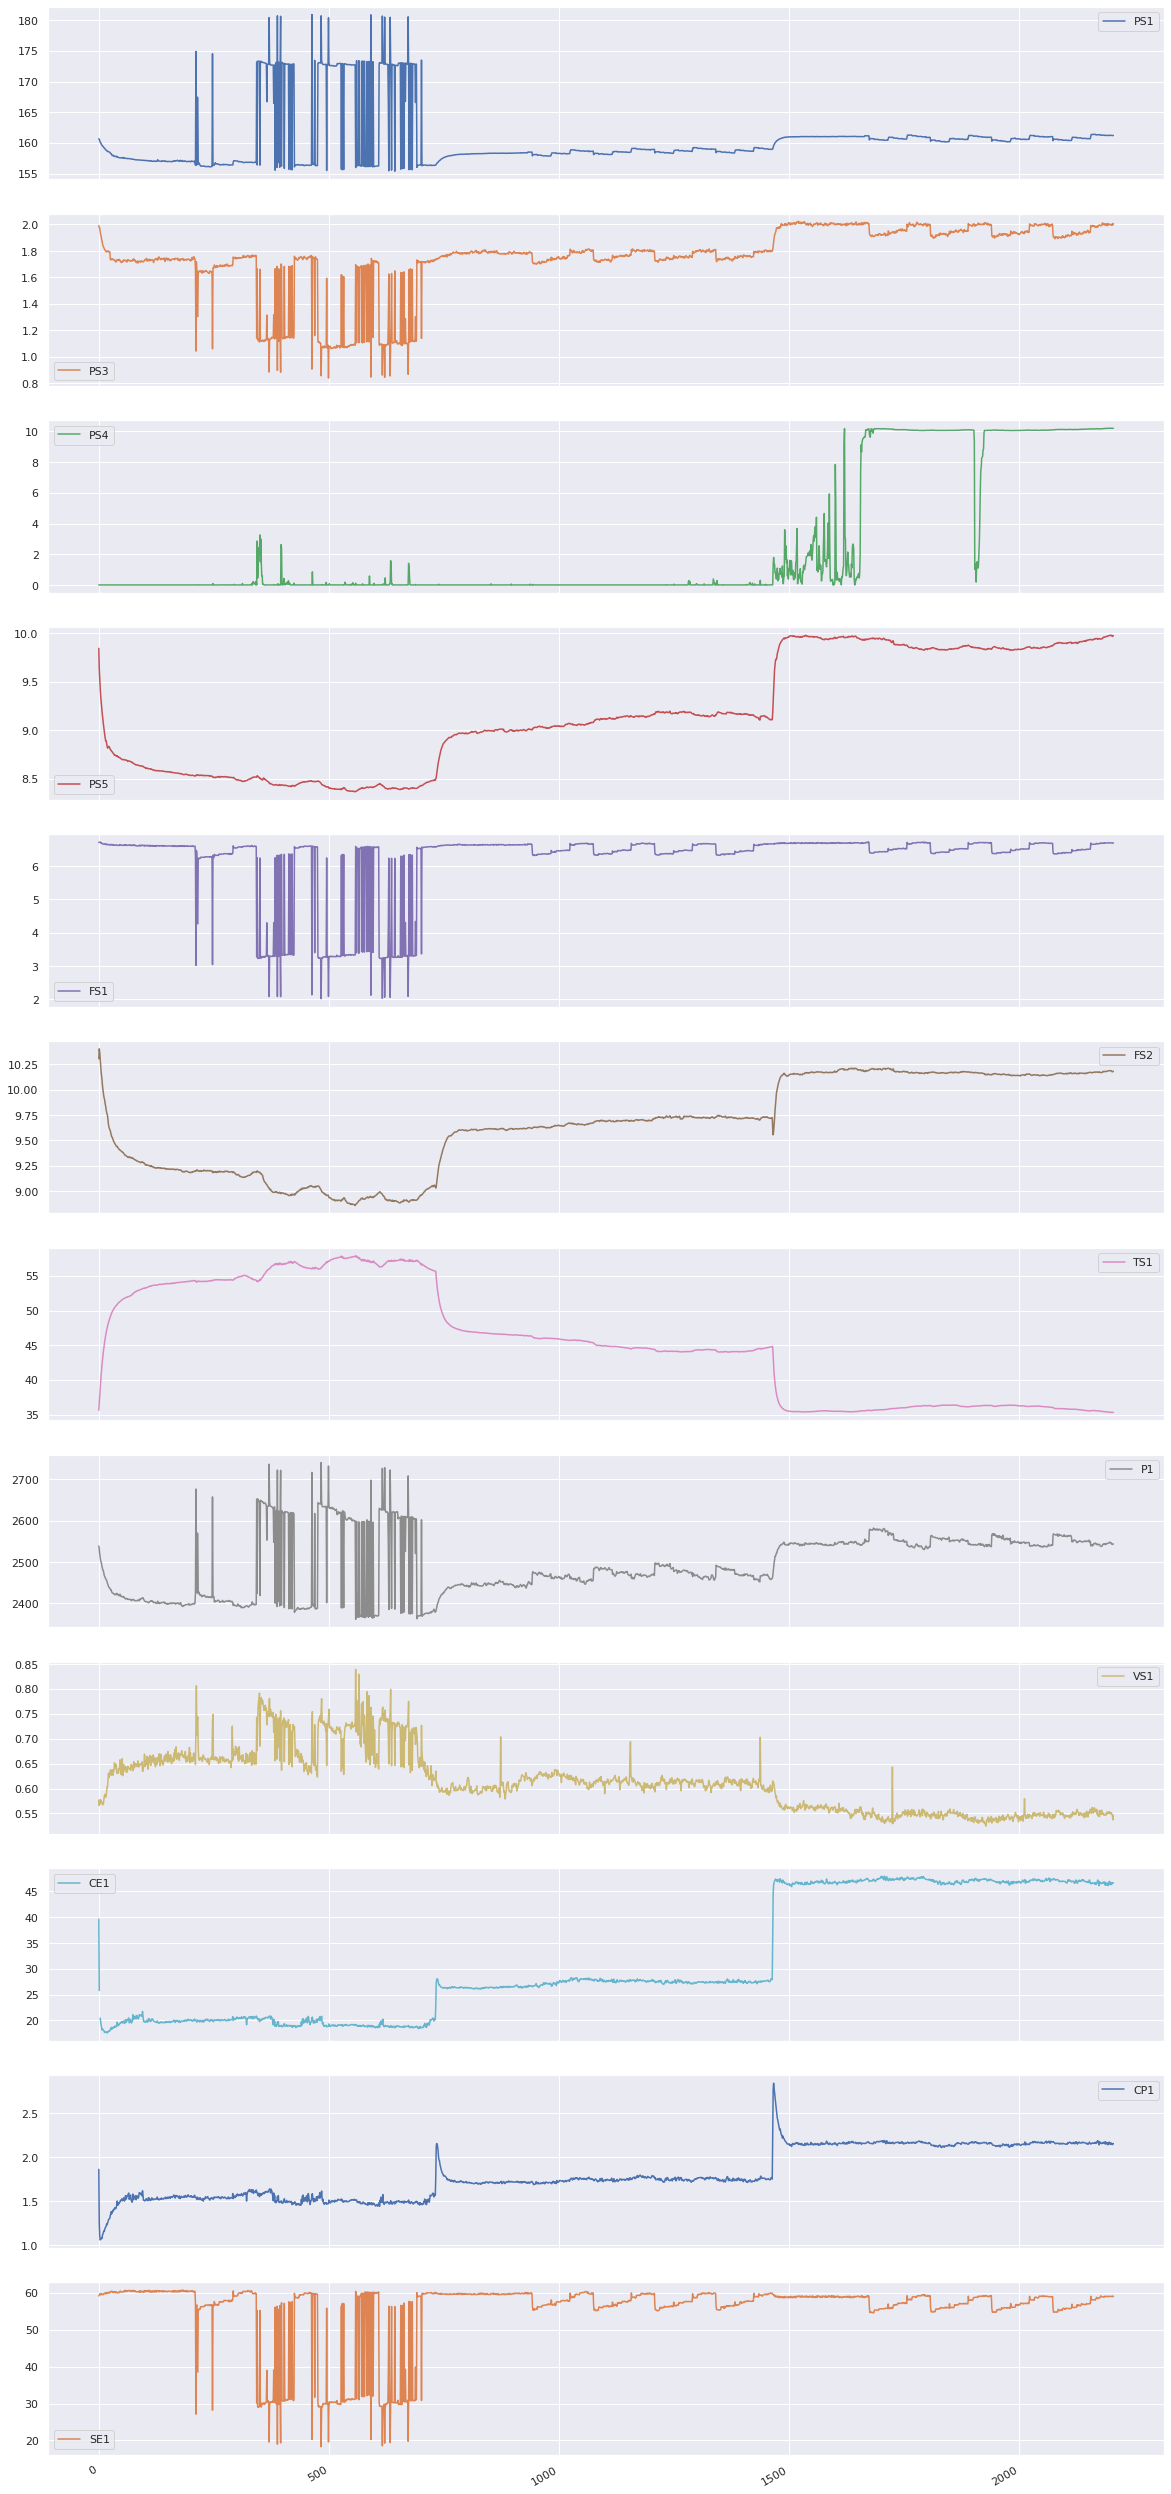

In [ ]:
import matplotlib.pyplot as plt
print(df0.plot(subplots = True, sharex = True, figsize = (20,50)))

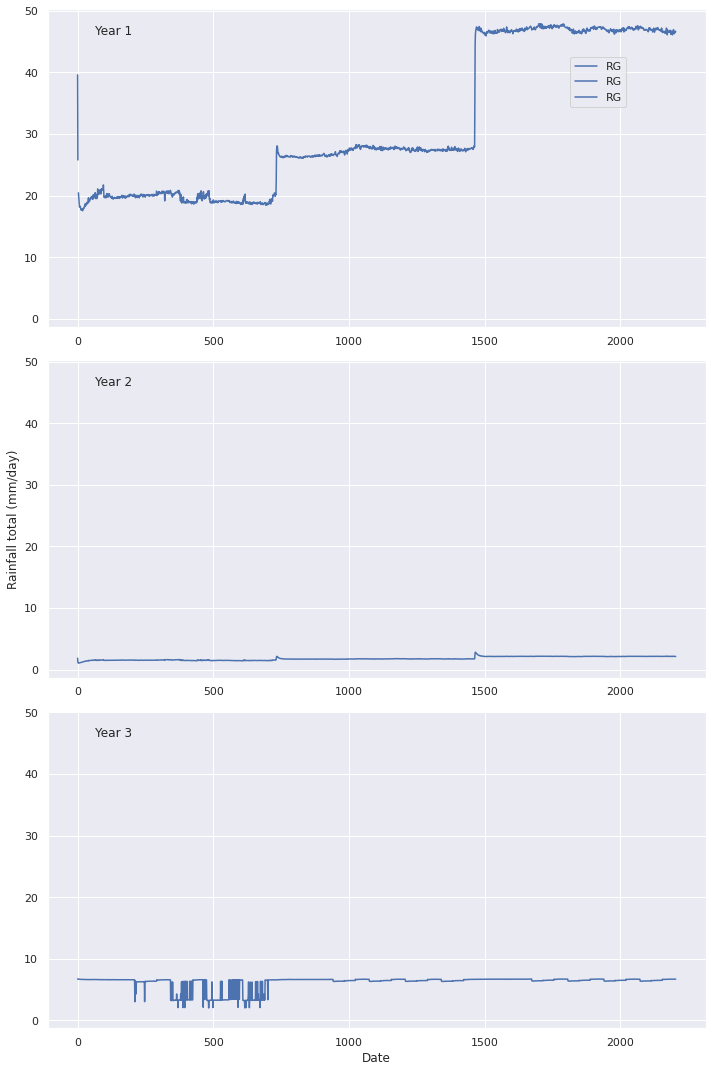

In [ ]:
fig,ax = plt.subplots(3, figsize=(10,15),sharey=True)

ax[0].plot(df0['CE1'], label='RG')
ax[0].set_title('Year 1',x=0.1,y=0.9)

ax[1].plot(df0['CP1'], label='RG')
ax[1].set_title('Year 2',x=0.1,y=0.9)
ax[1].set_ylabel('Rainfall total (mm/day)')

ax[2].plot(df0['FS1'], label='RG')
ax[2].set_title('Year 3',x=0.1,y=0.9)
ax[2].set_xlabel('Date')

fig.legend(loc=(0.8,0.9))
fig.tight_layout()
plt.show()

In [ ]:
df0.describe()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,1.753227,2.600266,9.163320,6.198549,9.649453,45.424567,2495.509203,0.613315,31.299077,1.808399,55.287900
std,4.699425,0.251902,4.279355,0.576296,1.032883,0.449246,7.991933,73.836682,0.060260,11.575330,0.278263,8.960189
min,155.391547,0.840252,0.000000,8.365800,2.018572,8.857513,35.313783,2361.747267,0.524367,17.555983,1.062150,18.276617
25%,158.100195,1.729733,0.000000,8.547239,6.391670,9.203397,36.237150,2442.933467,0.555100,20.084650,1.550100,56.270183
50%,158.960895,1.779631,0.000000,9.115781,6.576673,9.692270,44.836650,2480.926633,0.610183,27.392533,1.739683,58.758150
75%,161.000735,1.932047,3.503266,9.844351,6.657508,10.155008,54.104317,2548.211467,0.649850,46.677383,2.148483,59.656900
max,180.922708,2.023398,10.207068,9.978510,6.722707,10.403098,57.899283,2740.641000,0.839067,47.903667,2.840100,60.755300


Stability Prediction.

In [ ]:
df1 = pd.DataFrame(df, columns=['PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'cooler', 'valve', 'leakage', 'accumulator'])
df1.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,22.218233,1.113217,59.543150,3,100,0,130
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130


In [ ]:
possible_machine_states = list(df.stable.unique())
possible_machine_states

[1, 0]

In [ ]:
# Get all rows where machine status was "NORMAL"
df_status_NORMAL = df[ df["stable"] == 1 ]
nr_rows_machine_status_NORMAL = df_status_NORMAL.shape[0]
nr_rows_total = df.shape[0]
percent_machine_status_NORMAL = \
    (nr_rows_machine_status_NORMAL / nr_rows_total) * 100.0
percent_machine_status_NORMAL

34.285714285714285

In [ ]:
df_status_BROKEN = df[ df["stable"] == 0 ]
nr_rows_machine_status_BROKEN = df_status_BROKEN.shape[0]
print("So {0} times, the pump was broken".format(nr_rows_machine_status_BROKEN))
df_status_RECOVERING = df[ df["stable"] == 0 ]
nr_rows_machine_status_RECOVERING = df_status_RECOVERING.shape[0]
percent_machine_status_RECOVERING = \
    (nr_rows_machine_status_RECOVERING / nr_rows_total) * 100.0
percent_machine_status_RECOVERING

So 1449 times, the pump was broken


65.71428571428571

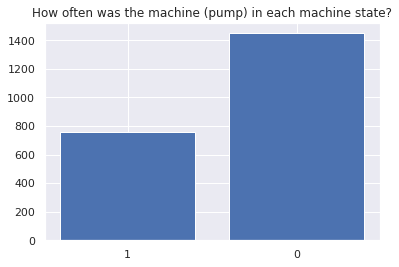

In [ ]:
import matplotlib.pyplot as plt

xpos = [1,2]
data = [nr_rows_machine_status_NORMAL,
        nr_rows_machine_status_BROKEN]

fig, ax = plt.subplots()
ax.bar(xpos,data)
ax.set_xticks(xpos)
ax.set_xticklabels(possible_machine_states)
ax.set_title("How often was the machine (pump) in each machine state?")
plt.show()

In [ ]:
row_numbers_machine_BROKEN = list(df_status_BROKEN["cycle_id"].values)
row_numbers_machine_BROKEN

[212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 386,
 387,
 388,
 389,
 390,
 391,
 392

In [ ]:
!pip install pyjanitor

     |████████████████████████████████| 102kB 4.1MB/s 


In [ ]:
import janitor
import datetime

In [ ]:

def calculate_rul(df):
    
    df_broken = df[df['stable'] == 0]
    L=[]
    d = df['date'].iloc[0]
    for date_broken in df_broken['date']:
        
        df_filtered = df.filter_date('date',d, date_broken)
        df_filtered['rul'] = date_broken - df_filtered['date']
        
        L.append(df_filtered)
        d = date_broken
    
    #L.append(df.filter_date('timestamp',df_broken['timestamp'].iloc[-1], df['timestamp'].iloc[-1]))
    result = pd.concat(L)
    

    return result.loc[~result.index.duplicated(keep='first')] #remove duplicates indices

df_rul = calculate_rul(df)

/usr/local/lib/python3.6/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# Here delta_t is calculated for 1 hour and delta_t_2 is calculated for 6 hourse, it can be changes by changing the 1 and 6 and "h" which states hours
df_rul['rul']

delta_t = np.timedelta64(1, 'h')
delta_t_2 = np.timedelta64(6, 'h')

In [ ]:
# Label1 indicates a failure will occur within the next 30 cycles.
# Here all the rows before 1 hour to actual failure were considered as failure which is 1 for early prediction
# 1 indicates failure, 0 indicates healthy 
df_rul['label1'] = np.where(df_rul['rul'] <= delta_t, 1, 0 )

In [ ]:
df_rul.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,1 days 11:10:00,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,1 days 11:00:00,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150,3,100,0,130,1,1 days 10:50:00,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,1 days 10:40:00,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,1 days 10:30:00,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols_normalize = df_rul.columns.difference(['cycle_id','date','rul','label1'])

scaler = MinMaxScaler()

df_rul[cols_normalize] = scaler.fit_transform(df_rul[cols_normalize])

In [ ]:
df_rul["rul"] = df_rul["rul"].apply(lambda x: x.total_seconds()/3600) #converting to hours

In [ ]:
df_rul.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0.000000,1,2019-01-01 00:00:00,0.206882,0.186170,0.973019,0.0,0.915458,0.916294,0.997260,0.936266,0.013646,0.005657,0.010638,0.059747,0.467630,0.167090,0.726427,0.450294,0.962378,0.0,1.0,0.0,1.0,1.0,35.166667,0
1,0.000454,2,2019-01-01 00:10:00,0.204134,0.182048,0.960137,0.0,0.787086,0.786912,0.998429,1.000000,0.060357,0.031915,0.034623,0.180994,0.448019,0.131819,0.271205,0.108777,0.966579,0.0,1.0,0.0,1.0,1.0,35.000000,0
2,0.000907,3,2019-01-01 00:20:00,0.194123,0.174836,0.956747,0.0,0.722230,0.720766,0.999110,0.976159,0.113658,0.075029,0.065457,0.231824,0.417480,0.165766,0.153628,0.028722,0.971465,0.0,1.0,0.0,1.0,1.0,34.833333,0
3,0.001361,4,2019-01-01 00:30:00,0.187870,0.171377,0.935069,0.0,0.665356,0.661798,0.999545,0.935028,0.157856,0.120602,0.101884,0.272994,0.395347,0.142676,0.095686,0.000000,0.977391,0.0,1.0,0.0,1.0,1.0,34.666667,0
4,0.001815,5,2019-01-01 00:40:00,0.180522,0.166470,0.914895,0.0,0.615710,0.611772,0.993113,0.893019,0.198806,0.164621,0.144721,0.310420,0.373989,0.168414,0.073516,0.004678,0.969396,0.0,1.0,0.0,1.0,1.0,34.500000,0


In [ ]:
df_rul['label1'].value_counts()

1    1545
0     660
Name: label1, dtype: int64

In [ ]:
# Saved to excel for Training and further processing
df_rul.to_excel("HydraulicRUL.xlsx")